# Statistical & Machine Learning Techniques for Marketing
# - Group Project - 

## Members:
 * Kurt Kusterer
 * Kanishk Gupta
 * Carlos Montenegro

## 0. Libraries & Data

In [948]:
library(knitr)
library(ggplot2)
library(plyr)
library(dplyr)
library(corrplot)
library(caret)
library(gridExtra)
library(scales)
library(randomForest)
library(psych)
library(xgboost)

In [949]:
# Upload the data
setwd("D:/User/Google Drive/Proyectos/Estudios/Maestría/Courses/15. Statistical & Machine Learning/Group Assignment/S&M Learning - Group files/R Script + Basetable/Files")
train <- read.csv('train.csv', stringsAsFactors = FALSE)
test <- read.csv('test.csv', stringsAsFactors = FALSE)

# Check the dimension of the train and test
print(dim(train))
print(dim(test))

[1] 1460   81
[1] 1459   80


In [950]:
# Some statistics of the variables
describe(train)

Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs introduced by coercion"Warning message in describe(train):
"NAs

"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing argum

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Id,1,1460,730.500000,421.610009,730.5,730.500000,541.1490,1,1460,1459,0.0000000,-1.20246603,11.03403825
MSSubClass,2,1460,56.897260,42.300571,50.0,49.152397,44.4780,20,190,170,1.4047656,1.56441572,1.10705654
MSZoning*,3,1460,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
LotFrontage,4,1201,70.049958,24.284752,69.0,68.943809,16.3086,21,313,292,2.1581677,17.34138406,0.70074848
LotArea,5,1460,10516.828082,9981.264932,9478.5,9563.284247,2962.2348,1300,215245,213945,12.1826150,202.26232234,261.22164217
Street*,6,1460,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Alley*,7,91,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
LotShape*,8,1460,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
LandContour*,9,1460,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Utilities*,10,1460,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA


In [951]:
# Quick overview of the missing values
for (col in names(train)){
    if (sum(is.na(train[col]))>0){
    print(paste(col,"has",sum(is.na(train[col])),"number of missing values"))   
    }
}

[1] "LotFrontage has 259 number of missing values"
[1] "Alley has 1369 number of missing values"
[1] "MasVnrType has 8 number of missing values"
[1] "MasVnrArea has 8 number of missing values"
[1] "BsmtQual has 37 number of missing values"
[1] "BsmtCond has 37 number of missing values"
[1] "BsmtExposure has 38 number of missing values"
[1] "BsmtFinType1 has 37 number of missing values"
[1] "BsmtFinType2 has 38 number of missing values"
[1] "Electrical has 1 number of missing values"
[1] "FireplaceQu has 690 number of missing values"
[1] "GarageType has 81 number of missing values"
[1] "GarageYrBlt has 81 number of missing values"
[1] "GarageFinish has 81 number of missing values"
[1] "GarageQual has 81 number of missing values"
[1] "GarageCond has 81 number of missing values"
[1] "PoolQC has 1453 number of missing values"
[1] "Fence has 1179 number of missing values"
[1] "MiscFeature has 1406 number of missing values"


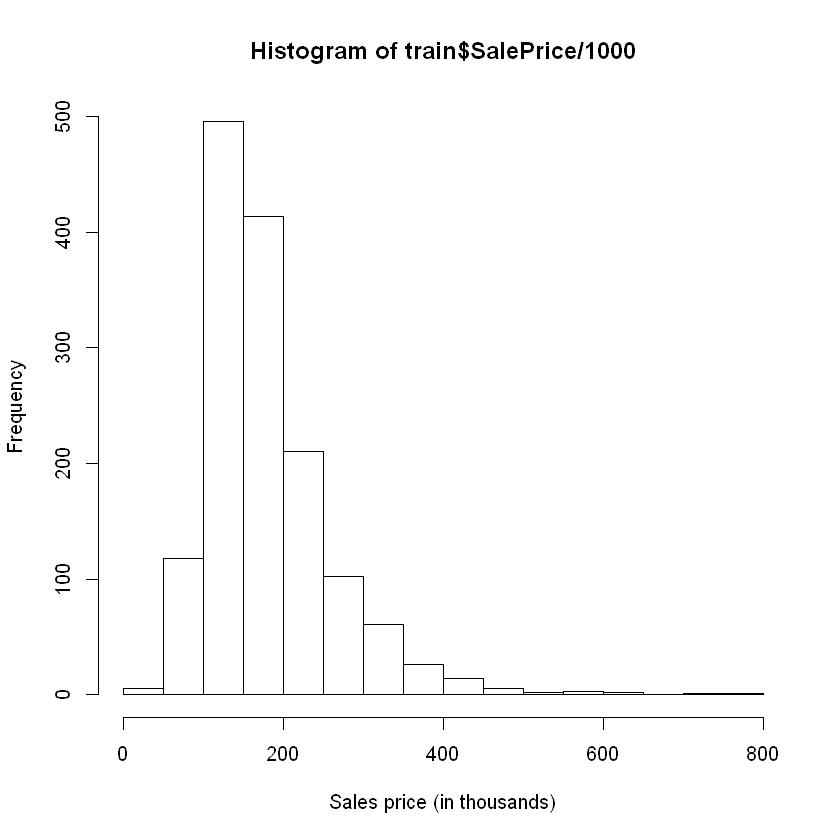

In [952]:
# Quick overview of the target variable
hist(train$SalePrice/1000, xlab="Sales price (in thousands)",ylab="Frequency")

# 2. Data

## 2.0. Quick check of variables

#### Numerical Variables

In [953]:
#Getting rid of the IDs
test_labels <- test$Id
test$Id <- NULL
train$Id <- NULL
test$SalePrice <- NA
# all <- rbind(train, test)

In [954]:
# Check the number of numerical variables 
numericVars <- which(sapply(train, is.numeric)) #index vector numeric variables
numericVarNames <- names(numericVars) #saving names vector for use later on
cat('There are', length(numericVars), 'numeric variables')
numericVarNames

There are 37 numeric variables

[1] "MSSubClass"    "LotFrontage"   "LotArea"       "OverallQual"  
 [5] "OverallCond"   "YearBuilt"     "YearRemodAdd"  "MasVnrArea"   
 [9] "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"  
[13] "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"    
[17] "BsmtFullBath"  "BsmtHalfBath"  "FullBath"      "HalfBath"     
[21] "BedroomAbvGr"  "KitchenAbvGr"  "TotRmsAbvGrd"  "Fireplaces"   
[25] "GarageYrBlt"   "GarageCars"    "GarageArea"    "WoodDeckSF"   
[29] "OpenPorchSF"   "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"  
[33] "PoolArea"      "MiscVal"       "MoSold"        "YrSold"       
[37] "SalePrice"

#### Categorical Variables

In [955]:
# Check the number of categorical variables 
# install.packages("tangram")
library("tangram")
categoricalVars <- which(sapply(train, is.categorical)) #index vector numeric variables
categoricalVarNames <- names(categoricalVars) #saving names vector for use later on
cat('There are', length(categoricalVars), 'categorical variables')
categoricalVarNames

There are 43 categorical variables

[1] "MSZoning"      "Street"        "Alley"         "LotShape"     
 [5] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
 [9] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[13] "HouseStyle"    "RoofStyle"     "RoofMatl"      "Exterior1st"  
[17] "Exterior2nd"   "MasVnrType"    "ExterQual"     "ExterCond"    
[21] "Foundation"    "BsmtQual"      "BsmtCond"      "BsmtExposure" 
[25] "BsmtFinType1"  "BsmtFinType2"  "Heating"       "HeatingQC"    
[29] "CentralAir"    "Electrical"    "KitchenQual"   "Functional"   
[33] "FireplaceQu"   "GarageType"    "GarageFinish"  "GarageQual"   
[37] "GarageCond"    "PavedDrive"    "PoolQC"        "Fence"        
[41] "MiscFeature"   "SaleType"      "SaleCondition"

## 2.0. Most relevant variables

#### Eta Squared - Categorical Variables
Eta squared measures the proportion of the total variance in a dependent variable that is associated with the membership of different groups defined by an independent variable.

In [956]:
# Select the categorical variables
subset_categorical <- train[categoricalVars]

#Checking the correlation between the variables and the dependent variable
# install.packages("lsr")
library (lsr)
corrcat <- function(x){
    treatment <- factor(as.numeric(factor(x)))
    outcome<-train$SalePrice
    anova <- aov(outcome ~ treatment)
    return(etaSquared(anova)[1])
    }

#We apply our newly created function and select the top 10 variables
corr_categoricals <- sapply(subset_categorical,corrcat)
head(sort(corr_categoricals, decreasing = TRUE),10)
cat_selected <- sort(corr_categoricals, decreasing = TRUE)[0:10]

Neighborhood    ExterQual  KitchenQual     BsmtQual       PoolQC        Alley 
   0.5455750    0.4773878    0.4565986    0.4537561    0.4486514    0.2854967 
GarageFinish   Foundation   GarageType    HeatingQC 
   0.2672764    0.2563684    0.2066384    0.1955005

#### RFE - Continous variables

A popular automatic method for feature selection provided by the caret R package is called Recursive Feature Elimination or RFE.

In [829]:
# #Select a subset with all the numeric variables
# subset_numeric <- train[numericVars]
# subset_numeric[is.na(subset_numeric)] <- 0

In [830]:
# #Select the best variables between the numeric variables
# # https://machinelearningmastery.com/feature-selection-with-the-caret-r-package/

# control <- rfeControl(functions=rfFuncs, method="cv", number=10)
# results <- rfe(subset_numeric, train$SalePrice, rfeControl=control)

In [831]:
# predictors(results)
# results

[1] "SalePrice"    "OverallQual"  "GrLivArea"    "YearBuilt"    "GarageCars"  
 [6] "TotalBsmtSF"  "X1stFlrSF"    "GarageArea"   "YearRemodAdd" "GarageYrBlt" 
[11] "X2ndFlrSF"    "LotArea"      "Fireplaces"   "MSSubClass"   "FullBath"    
[16] "BsmtFinSF1"


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables  RMSE Rsquared  MAE RMSESD RsquaredSD  MAESD Selected
         4 15140   0.9688 8375   4061   0.010989 1347.4         
         8 13146   0.9750 6579   4035   0.014445  936.1         
        16 10100   0.9853 4791   3584   0.009545  961.6        *
        37 10527   0.9842 4573   4393   0.010371  993.3         

The top 5 variables (out of 16):
   SalePrice, OverallQual, GrLivArea, YearBuilt, GarageCars


#### Correlation matrix - Continuous variables

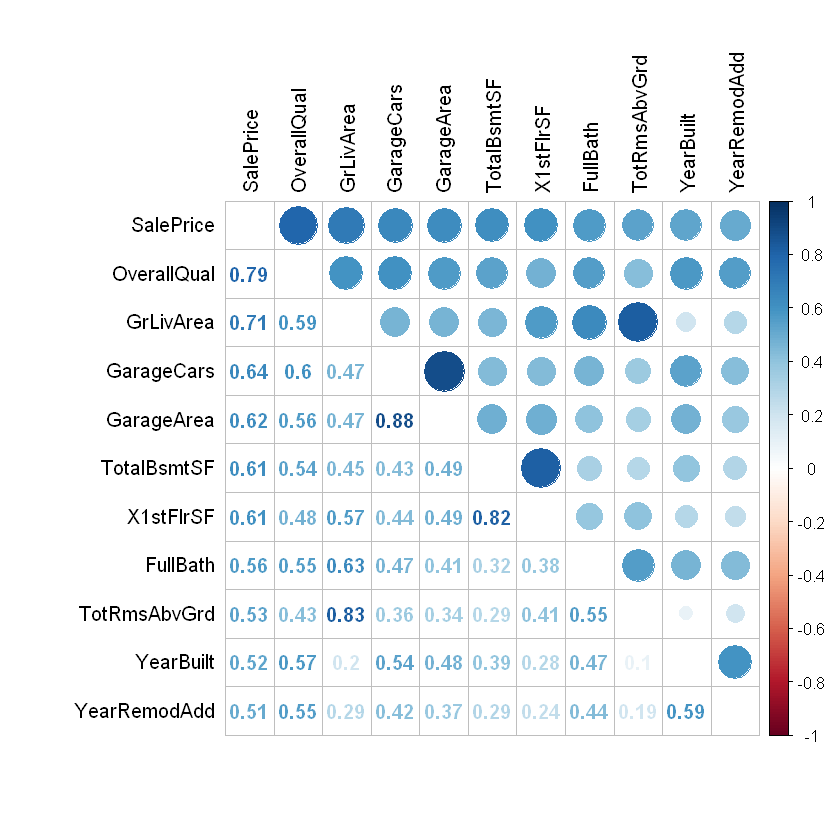

In [957]:
#Select the numeric variables
all_numVar <- train[, numericVars]
cor_numVar <- cor(all_numVar, use="pairwise.complete.obs") #correlations of all numeric variables

#sort on decreasing correlations with SalePrice
cor_sorted <- as.matrix(sort(cor_numVar[,'SalePrice'], decreasing = TRUE))

#select only high corelations
CorHigh <- names(which(apply(cor_sorted, 1, function(x) abs(x)>0.5)))
cor_numVar <- cor_numVar[CorHigh, CorHigh]

# create the correlation matrix
corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt")

#### Variables to keep

In [958]:
# Select the preselected variables (numeric and categorical) from the train dataset
selected_var <- c(names(cat_selected),colnames(cor_numVar))

## 2.1. Preprocessing of data

In [959]:
# Create the datasets that will be cleaned
train_clean<-train[,selected_var]
test_clean<-test[,selected_var]

In [960]:
str(train_clean)

'data.frame':	1460 obs. of  21 variables:
 $ Neighborhood: chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ ExterQual   : chr  "Gd" "TA" "Gd" "TA" ...
 $ KitchenQual : chr  "Gd" "TA" "Gd" "Gd" ...
 $ BsmtQual    : chr  "Gd" "Gd" "Gd" "TA" ...
 $ PoolQC      : chr  NA NA NA NA ...
 $ Alley       : chr  NA NA NA NA ...
 $ GarageFinish: chr  "RFn" "RFn" "RFn" "Unf" ...
 $ Foundation  : chr  "PConc" "CBlock" "PConc" "BrkTil" ...
 $ GarageType  : chr  "Attchd" "Attchd" "Attchd" "Detchd" ...
 $ HeatingQC   : chr  "Ex" "Ex" "Ex" "Gd" ...
 $ SalePrice   : int  208500 181500 223500 140000 250000 143000 307000 200000 129900 118000 ...
 $ OverallQual : int  7 6 7 7 8 5 8 7 7 5 ...
 $ GrLivArea   : int  1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 ...
 $ GarageCars  : int  2 2 2 3 3 2 2 2 2 1 ...
 $ GarageArea  : int  548 460 608 642 836 480 636 484 468 205 ...
 $ TotalBsmtSF : int  856 1262 920 756 1145 796 1686 1107 952 991 ...
 $ X1stFlrSF   : int  856 1262 920 961 1145 796 1694 1107 10

### Both Categorical and numerical

#### NA

In [961]:
# Replacing missings on the Train
for (col in names(cat_selected)){
  
            train_clean[is.na(train_clean[,col]),col] <- "None"
}
for (col in colnames(cor_numVar)){
            
            train_clean[is.na(train_clean[,col]),col] <- 0
}


# Replacing missings on the test
for (col in names(cat_selected)){
  
            test_clean[is.na(test_clean[,col]),col] <- "None"
}
for (col in colnames(cor_numVar)){
            
            test_clean[is.na(test_clean[,col]),col] <- 0
}

### Numeric

#### Winzorization

In [962]:
install.packages("robustHD")
library(robustHD)

#Winsorizing data from both train and test sets
train_clean$GrLivArea <- winsorize(train_clean$GrLivArea,probs = c(0.0, 0.95)) 
train_clean$GarageArea <- winsorize(train_clean$GarageArea,probs = c(0.0, 0.95)) 
train_clean$TotalBsmtSF <- winsorize(train_clean$TotalBsmtSF,probs = c(0.0, 0.95)) 
train_clean$X1stFlrSF <- winsorize(train_clean$X1stFlrSF,probs = c(0.0, 0.95)) 
train_clean$YearBuilt <- winsorize(train_clean$YearBuilt,probs = c(0.0, 0.95)) 
train_clean$YearRemodAdd <- winsorize(train_clean$YearRemodAdd,probs = c(0.05, 0.95)) 

test_clean$GrLivArea <- winsorize(test_clean$GrLivArea,probs = c(0.0, 0.95)) 
test_clean$GarageArea <- winsorize(test_clean$GarageArea,probs = c(0.0, 0.95)) 
test_clean$TotalBsmtSF <- winsorize(test_clean$TotalBsmtSF,probs = c(0.0, 0.95)) 
test_clean$X1stFlrSF <- winsorize(test_clean$X1stFlrSF,probs = c(0.0, 0.95)) 
test_clean$YearBuilt <- winsorize(test_clean$YearBuilt,probs = c(0.0, 0.95)) 
test_clean$YearRemodAdd <- winsorize(test_clean$YearRemodAdd,probs = c(0.0, 0.95))

Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'robustHD' is in use and will not be installed"

In [963]:
# Introduce the maximum value to the observations that are missing
train_clean[is.na(train_clean[,'GrLivArea']),"GrLivArea"] <- max(train_clean$GrLivArea)
train_clean[is.na(train_clean[,'GarageCars']),'GarageCars'] <- max(train_clean$GarageCars)
train_clean[is.na(train_clean[,'TotalBsmtSF']),'TotalBsmtSF'] <- max(train_clean$TotalBsmtSF)
train_clean[is.na(train_clean[,'X1stFlrSF']),'X1stFlrSF'] <- max(train_clean$X1stFlrSF)
train_clean[is.na(train_clean[,'YearBuilt']),'YearBuilt'] <- max(train_clean$YearBuilt)
train_clean[is.na(train_clean[,'YearRemodAdd']),'YearRemodAdd'] <- max(train_clean$YearRemodAdd)

test_clean[is.na(test_clean[,'GrLivArea']),"GrLivArea"] <- max(test_clean$GrLivArea)
test_clean[is.na(test_clean[,'GarageCars']),'GarageCars'] <- max(test_clean$GarageCars)
test_clean[is.na(test_clean[,'TotalBsmtSF']),'TotalBsmtSF'] <- max(test_clean$TotalBsmtSF)
test_clean[is.na(test_clean[,'X1stFlrSF']),'X1stFlrSF'] <- max(test_clean$X1stFlrSF)
test_clean[is.na(test_clean[,'YearBuilt']),'YearBuilt'] <- max(test_clean$YearBuilt)
test_clean[is.na(test_clean[,'YearRemodAdd']),'YearRemodAdd'] <- max(test_clean$YearRemodAdd)

### Categorical variables

#### Dummy Encoding (not run yet)

In [964]:
# Select the variable that we want to use for our models
new_selected_var=c('TotalBsmtSF','GrLivArea','X1stFlrSF','KitchenQual','BsmtQual',"PoolQC",'FullBath','GarageArea','Neighborhood','SalePrice')

# Create the datasets that will go trough the dummy encoding
train_clean<-train_clean[,new_selected_var]
test_clean<-test_clean[,new_selected_var]

In [965]:
# We select the categorical variables where we want to apply the dummy encoding
cat_selected<-c('KitchenQual','BsmtQual','PoolQC','Neighborhood')

#Apply this method to the train
dmy <- dummyVars(" ~ .", data =train_clean[,cat_selected])
tmp <- data.frame(predict(dmy, newdata = train_clean[,cat_selected]))
train_clean <- cbind(train_clean, tmp)
train_clean <- train_clean[, !colnames(train_clean) %in% cat_selected]

#Apply this method to the test
dmy <- dummyVars(" ~ .", data =test_clean[,cat_selected])
tmp <- data.frame(predict(dmy, newdata = test_clean[,cat_selected]))
test_clean <- cbind(test_clean, tmp)
test_clean <- test_clean[, !colnames(test_clean) %in% cat_selected]

# 3. Model

In [966]:
# Create the train and validation set that include the variables Sale Price
train_idx <- cbind(train_clean, train$SalePrice)
set.seed(1)
train_idx <- sample(1:nrow(train_clean), 1022)
data_train <- train_clean[train_idx, ]  # 1022
data_test <- train_clean[-train_idx, ]  # rest

In [968]:
str(data_train)

'data.frame':	1022 obs. of  44 variables:
 $ TotalBsmtSF        : num  1504 1687 660 964 1488 ...
 $ GrLivArea          : num  1504 2046 1348 2236 1502 ...
 $ X1stFlrSF          : num  1504 1782 660 993 1502 ...
 $ FullBath           : int  2 2 1 2 1 1 1 2 2 1 ...
 $ GarageArea         : num  478 834 453 642 528 539 504 462 825 216 ...
 $ SalePrice          : int  203000 372500 155000 222000 212000 175000 148000 189000 227000 114504 ...
 $ KitchenQualEx      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ KitchenQualFa      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ KitchenQualGd      : num  1 1 0 1 1 0 0 1 1 0 ...
 $ KitchenQualTA      : num  0 0 1 0 0 1 1 0 0 1 ...
 $ BsmtQualEx         : num  0 1 0 0 0 0 0 0 0 0 ...
 $ BsmtQualFa         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ BsmtQualGd         : num  1 0 0 1 1 0 0 1 1 0 ...
 $ BsmtQualNone       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ BsmtQualTA         : num  0 0 1 0 0 1 1 0 0 1 ...
 $ PoolQCEx           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ PoolQCFa           : num  

## 3.2. Models

### Linear Regression

In [939]:
#Selecting the model and generating its predictions
model_lm <- lm(SalePrice ~ . -SalePrice, data=data_train)
pred_lm_train <-predict(model_lm,data_train)
pred_lm_test <-predict(model_lm,data_test)
# pred_lm_predict <-predict(model_lm,test_clean)


Warning message in predict.lm(model_lm, data_train):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model_lm, data_test):
"prediction from a rank-deficient fit may be misleading"

In [940]:
Rsquared <-function(pred_test){
    preds<-pred_test
    actual<-data_test$SalePrice
    rss <- sum((preds - actual) ^ 2)
    tss <- sum((actual - mean(actual)) ^ 2)
    rsq <- 1 - rss/tss
    print(rsq)
    }

Rsquared(pred_lm_test)

[1] 0.8192053


### Regression tree

In [666]:
#https://www.r-bloggers.com/gradient-boosting-in-r/
library(tree)
md_tree <- tree(SalePrice ~ ., data=data_train)
pred_tree_train <-predict(md_tree,newdata=data_train)
pred_tree_test <-predict(md_tree,newdata=data_test)

In [667]:
Rsquared(pred_tree_test)

[1] 0.7318627


### Gradient Boosting regression tree

In [668]:
#Run de model and predict
library(gbm)
md_gbm <- gbm(SalePrice ~ ., data=data_train,distribution = "gaussian", n.trees = 1000,shrinkage = 0.01, interaction.depth = 4)
#pred_gbm_train <-predict(md_gbm,newdata=data_train,n.trees = 1000)
pred_gbm_test <-predict(md_gbm,newdata=data_train,n.trees = 1000)

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 20: NeighborhoodBlueste has no variation."

In [669]:
Rsquared(pred_gbm_test)

Warning message in preds - actual:
"longer object length is not a multiple of shorter object length"

[1] -3.078164


### Ridge Regression

In [483]:
#https://drsimonj.svbtle.com/ridge-regression-with-glmnet
library(glmnet)

# Getting the independent and dependent variable. And setting a range for lambda values.
x_var <- data.matrix(select (data_train,-c(SalePrice)))
y_var <- data_train[, "SalePrice"]
lambdas <- 10^seq(3, -2, by = -.1)

#We run the model and predict
cv_fit <- cv.glmnet(x_var, y_var, alpha = 0, lambda = lambdas)
opt_lambda <- cv_fit$lambda.min
fit <- cv_fit$glmnet.fit

# prediction on test
x_var_test <- data.matrix(select (data_test,-c(SalePrice)))
y_var_test <- data_test[, "SalePrice"]
pred_ridge_test <- predict(fit, s = opt_lambda, newx = x_var)


In [484]:
Rsquared(pred_ridge_test)

Warning message in preds - actual:
"longer object length is not a multiple of shorter object length"

[1] -3.089931


### Random forest

In [969]:
# Perform training:
rf_classifier = randomForest(SalePrice ~ ., data=data_train, ntree=100, importance=TRUE)

In [970]:
pred_random_test = predict(rf_classifier, newdata=data_test)
Rsquared(pred_random_test)

[1] 0.8519558


### SVM

In [487]:
# library(e1071)
# #SVM
# classifier = svm(formula = SalePrice ~ ., 
#                  data = data_train, 
#                  type = 'C-classification', 
#                  kernel = 'linear')

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
"Variable(s) 'NeighborhoodBlueste' constant. Cannot scale data."

In [488]:
# pred_SVM_test = predict(classifier, newdata = data_test) 
# Rsquared(as.numeric(pred_SVM_test))

[1] -4.958325


### Lasso

In [672]:
# We can set custom controls using the caret package 
# the method is trainControl ##
custom <- trainControl(method = "repeatedCV",
                       number = 15,
                       repeats = 5,
                       verboseIter = T)

### Lasso Regression ###
lasso <- train(SalePrice ~ .,
               data_train,
               method = 'glmnet',
               tuneGrid= expand.grid(alpha = 1,
                                     lambda = seq(0.0001, 1, length = 5)),
               trControl = custom)

Warning message:
"`repeats` has no meaning for this resampling method."

+ Fold01.Rep1: alpha=1, lambda=1 
- Fold01.Rep1: alpha=1, lambda=1 
+ Fold02.Rep1: alpha=1, lambda=1 
- Fold02.Rep1: alpha=1, lambda=1 
+ Fold03.Rep1: alpha=1, lambda=1 
- Fold03.Rep1: alpha=1, lambda=1 
+ Fold04.Rep1: alpha=1, lambda=1 
- Fold04.Rep1: alpha=1, lambda=1 
+ Fold05.Rep1: alpha=1, lambda=1 
- Fold05.Rep1: alpha=1, lambda=1 
+ Fold06.Rep1: alpha=1, lambda=1 
- Fold06.Rep1: alpha=1, lambda=1 
+ Fold07.Rep1: alpha=1, lambda=1 
- Fold07.Rep1: alpha=1, lambda=1 
+ Fold08.Rep1: alpha=1, lambda=1 
- Fold08.Rep1: alpha=1, lambda=1 
+ Fold09.Rep1: alpha=1, lambda=1 
- Fold09.Rep1: alpha=1, lambda=1 
+ Fold10.Rep1: alpha=1, lambda=1 
- Fold10.Rep1: alpha=1, lambda=1 
+ Fold11.Rep1: alpha=1, lambda=1 
- Fold11.Rep1: alpha=1, lambda=1 
+ Fold12.Rep1: alpha=1, lambda=1 
- Fold12.Rep1: alpha=1, lambda=1 
+ Fold13.Rep1: alpha=1, lambda=1 
- Fold13.Rep1: alpha=1, lambda=1 
+ Fold14.Rep1: alpha=1, lambda=1 
- Fold14.Rep1: alpha=1, lambda=1 
+ Fold15.Rep1: alpha=1, lambda=1 
- Fold15.Rep1:

In [673]:
# run on test
pred_lasso_test <- predict(lasso, new = data_test)

Rsquared(pred_lasso_test)
# pred_lasso_test <- as.data.frame(test_lasso)

[1] 0.8216569


### GAM

In [942]:
# library(mgcv)
# gam_mod <- gam(SalePrice ~ s(OverallQual), data = data_train)

In [941]:
# pred_gam_test <- predict.gam(gam_mod,data_test)

In [493]:
# Rsquared(pred_gam_test)

[1] 0.7219587


# Visualization & Business sense

In [980]:
# Complete the categories
test_clean$PoolQCFa<-0

# Predict our values
pred_random_test = predict(rf_classifier, newdata=test_clean)

In [981]:
# Take some variables from the test in order to plot them
test_clean$pred_random_test<-pred_random_test
test_clean$KitchenQual<-test$KitchenQual
test_clean$BsmtQual<-test$BsmtQual
test_clean$PoolQC <-test$PoolQC 
test_clean$Neighborhood <-test$Neighborhood 

In [982]:
# Create the random values for the market prices
set.seed(123)
test_clean$MarketPrice<-runif(1459, min=65249, max=558845)

In [983]:
# Create the differences between our predicted values and market prices
test_clean$difference<-test_clean$pred_random_test-test_clean$MarketPrice

In [984]:
# Identify the undervalued properties
test_clean$undervalued<-test_clean$difference>0

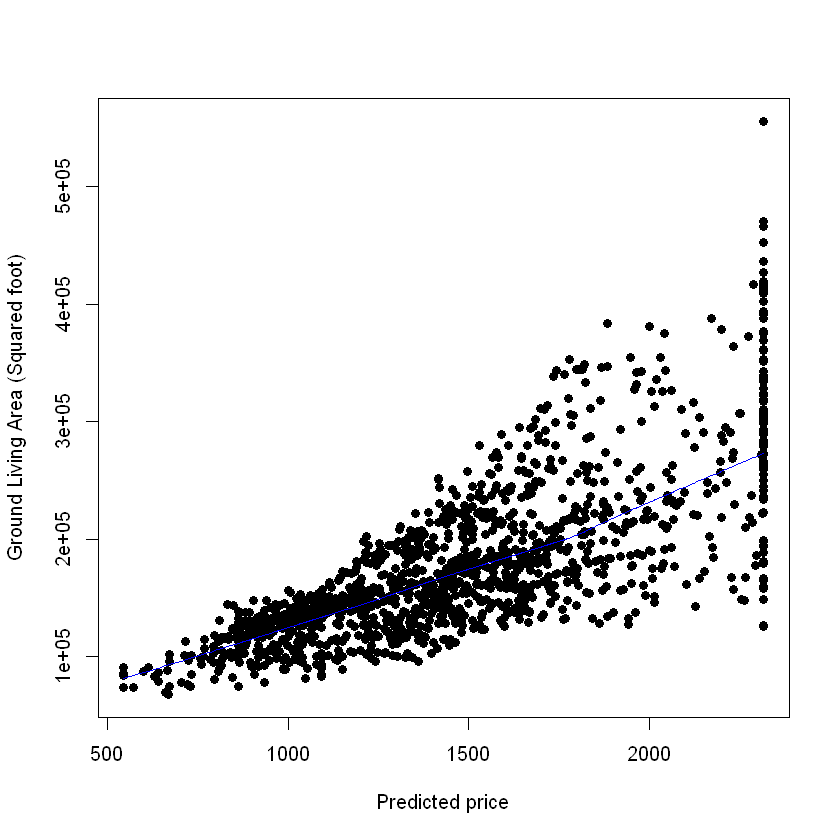

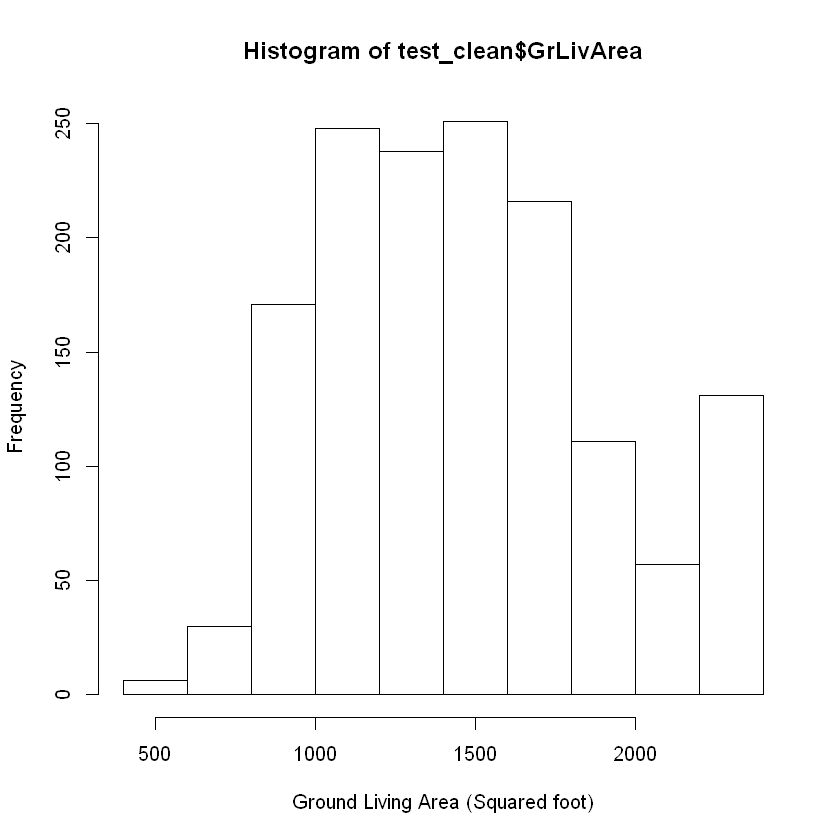

In [985]:
# Important numerical variable
plot(test_clean$GrLivArea,test_clean$pred_random_test,
   xlab="Predicted price", ylab="Ground Living Area (Squared foot)", pch=19)
lines(lowess(test_clean$GrLivArea,test_clean$pred_random_test), col="blue") # lowess line (x,y)
hist(test_clean$GrLivArea,xlab="Ground Living Area (Squared foot)")

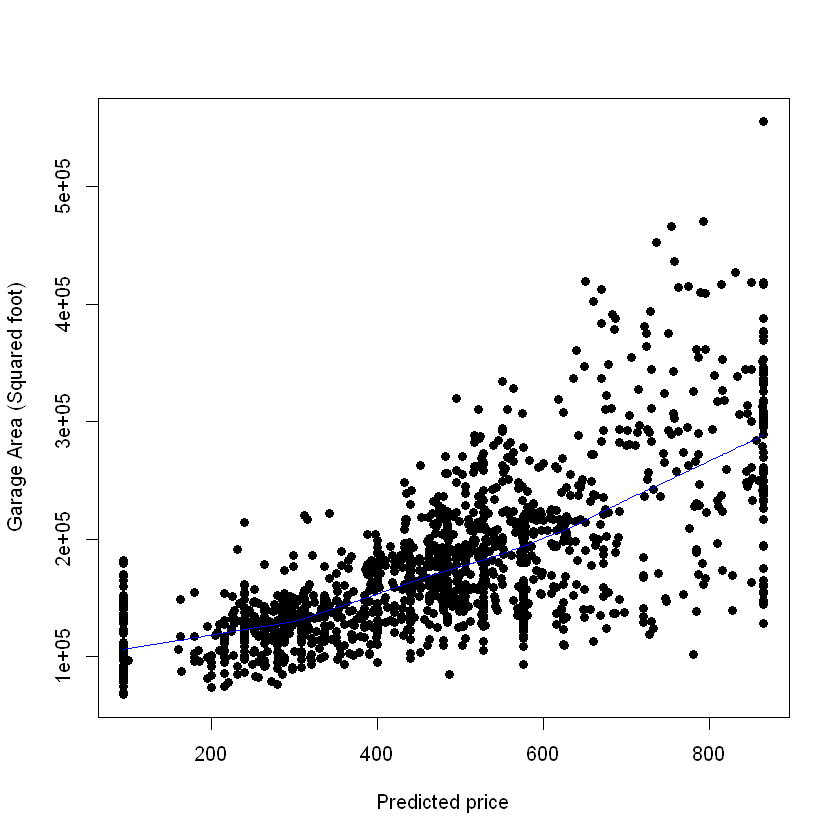

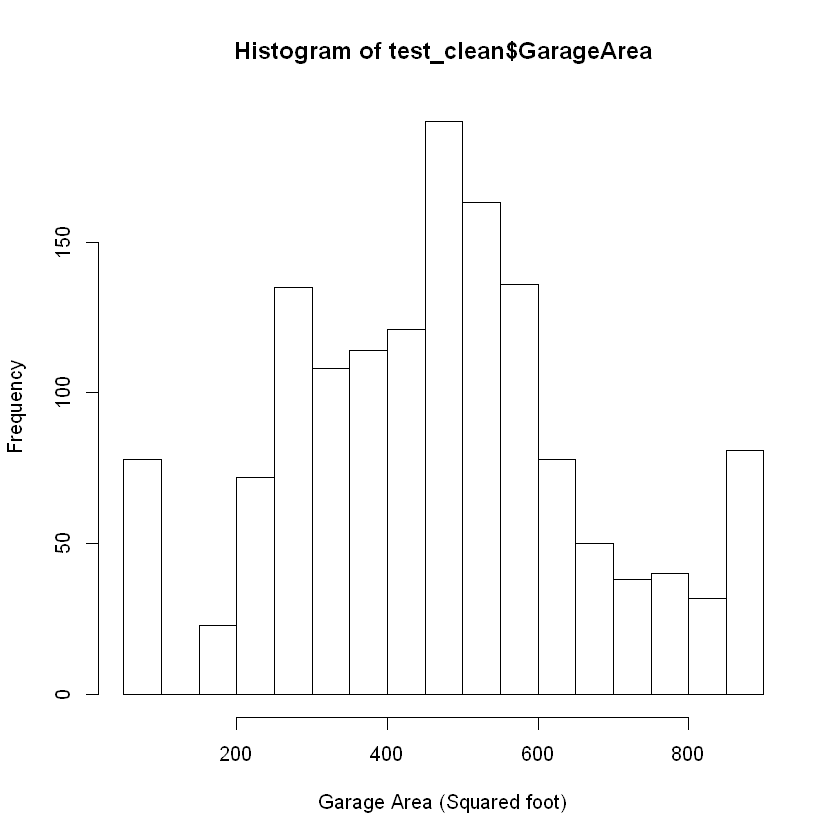

In [986]:
# Other important numerical variable
plot(test_clean$GarageArea,test_clean$pred_random_test,
   xlab="Predicted price", ylab="Garage Area (Squared foot)", pch=19)
lines(lowess(test_clean$GarageArea,test_clean$pred_random_test), col="blue") # lowess line (x,y)
hist(test_clean$GarageArea,xlab="Garage Area (Squared foot)")

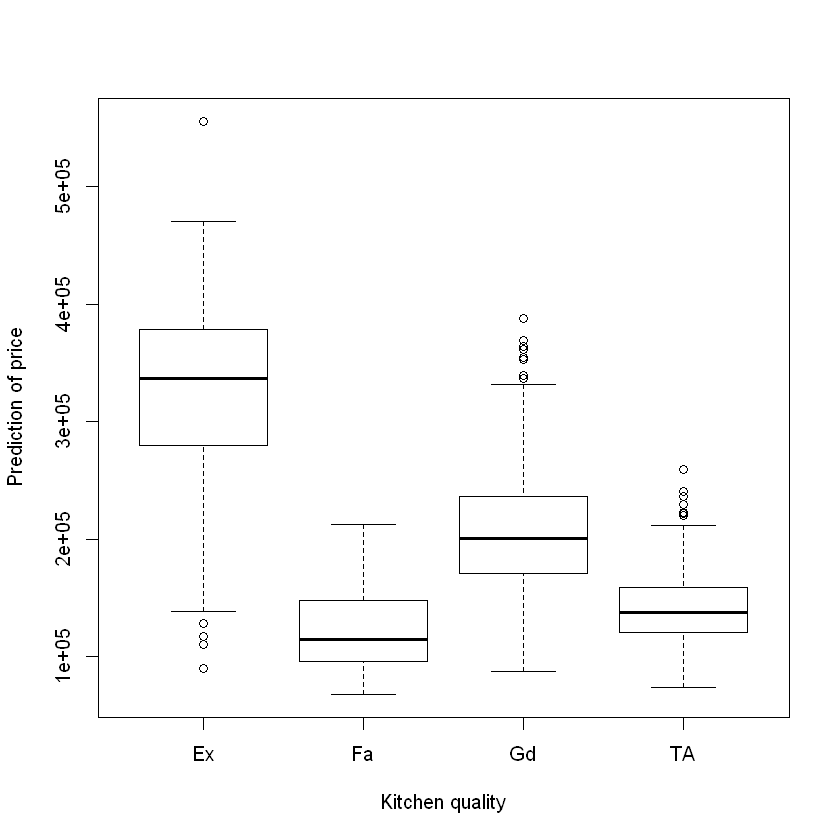

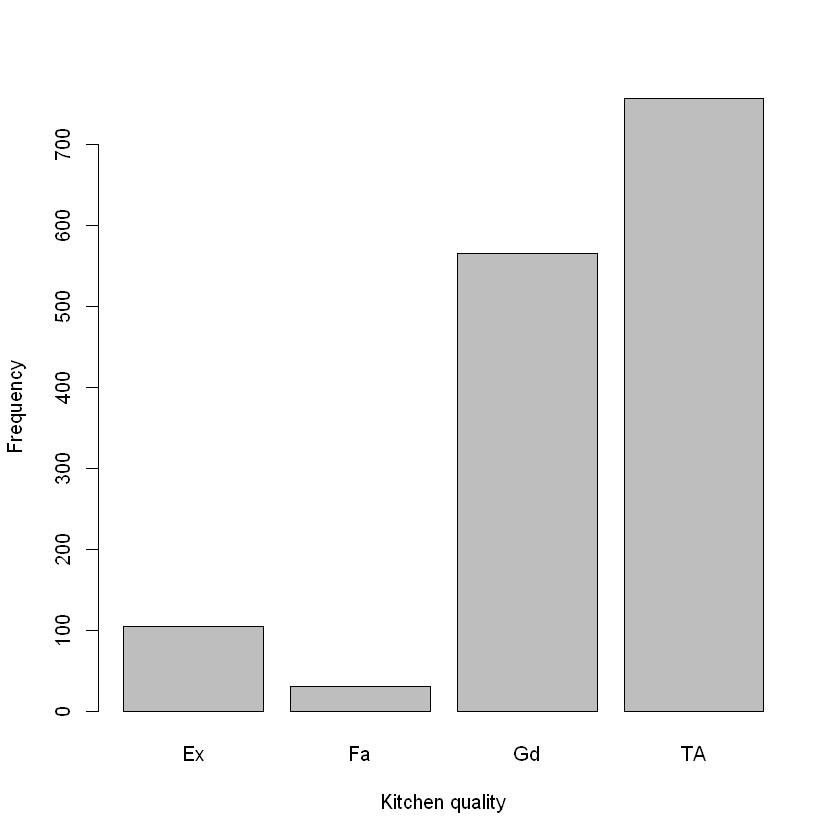

In [987]:
# hist(test_clean$KitchenQual)
# plot(test_clean$pred_random_test, test_clean$KitchenQual.category, xlab = "Kitchen quality", ylab = "Prediction of price")

boxplot(test_clean$pred_random_test~test_clean$KitchenQual,
   xlab="Kitchen quality", ylab="Prediction of price",scientific=FALSE)
barplot(table(test_clean$KitchenQual),xlab="Kitchen quality",ylab="Frequency")

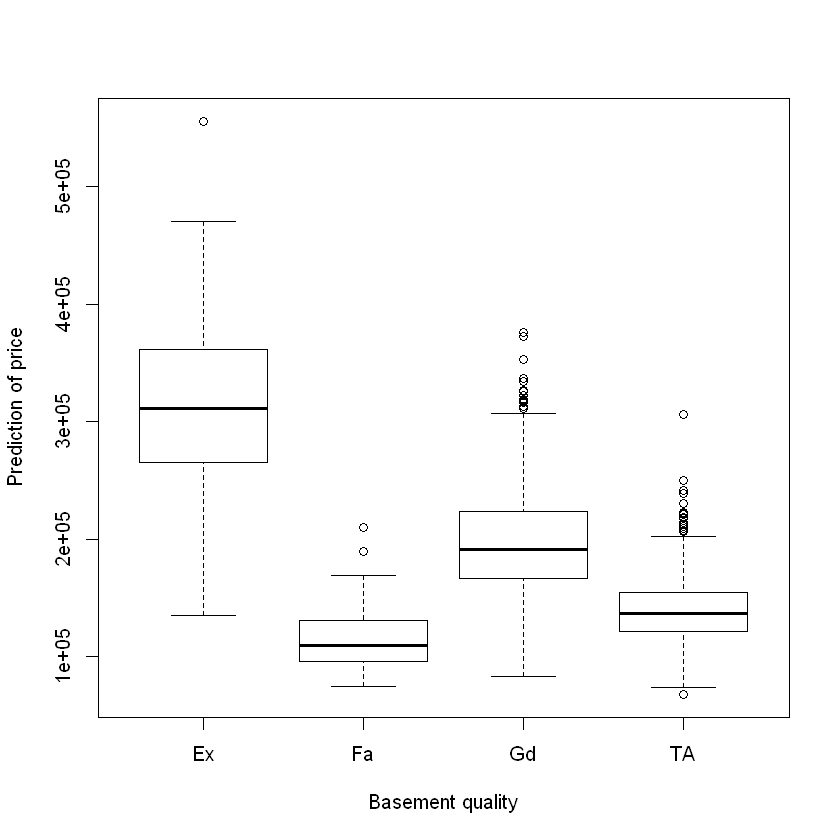

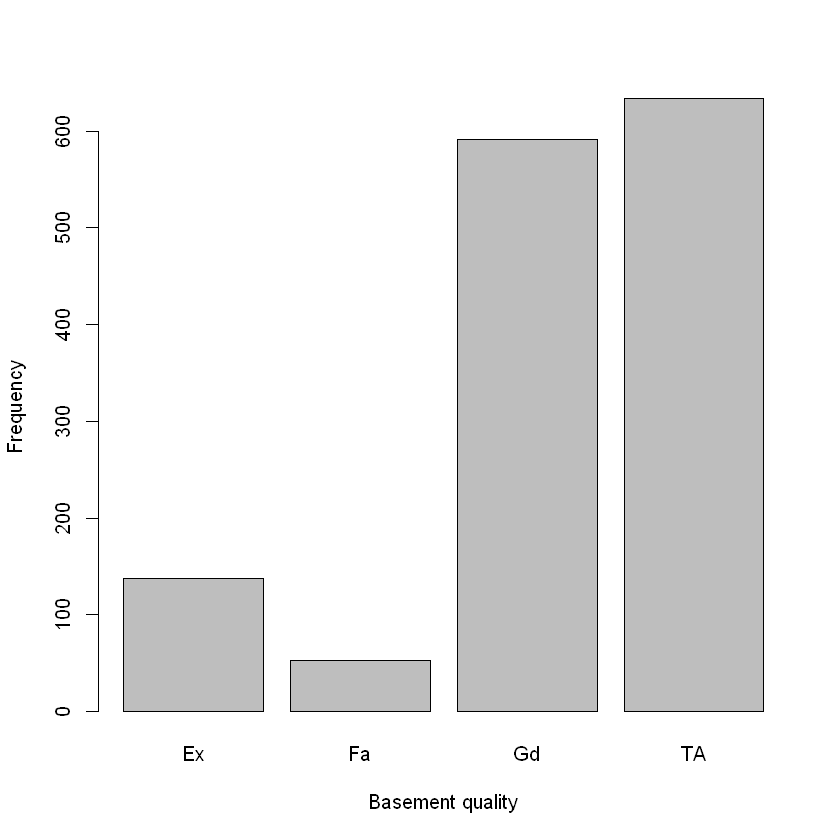

In [988]:
boxplot(test_clean$pred_random_test~test_clean$BsmtQual,
   xlab="Basement quality", ylab="Prediction of price",scientific=FALSE)
barplot(table(test_clean$BsmtQual),xlab="Basement quality",ylab="Frequency")

In [823]:
# Create dataframe with undervalued properties 
undervalued_properties<-test_clean[test_clean$undervalued==TRUE,]

In [992]:
# Create dataframe with the important variables
undervalued_properties[,c('TotalBsmtSF','GrLivArea','FullBath',
                                                                      'GarageArea','X1stFlrSF','KitchenQual',
                                                                      'BsmtQual','PoolQC','Neighborhood',
                                                                      'pred_random_test','difference','MarketPrice')]

,TotalBsmtSF,GrLivArea,FullBath,GarageArea,X1stFlrSF,KitchenQual,BsmtQual,PoolQC,Neighborhood,pred_random_test,difference,MarketPrice
6,763.000,1655.000,2,440.000,763.000,TA,Gd,NA,Gilbert,180508.3,92772.8412,87735.51
15,836.000,836.000,1,308.000,836.000,TA,Gd,NA,NPkVill,122281.3,6229.1179,116052.21
17,1544.000,1544.000,2,865.476,1544.000,Gd,Gd,NA,NridgHt,233926.0,47209.0584,186716.92
18,1698.000,1698.000,2,730.000,1698.000,Ex,Ex,NA,NridgHt,310266.5,224257.1276,86009.42
19,1711.509,1822.000,2,678.000,1775.822,Ex,Ex,NA,NridgHt,348142.2,121032.8097,227109.36
27,1629.000,2318.595,2,865.476,1645.000,Gd,Ex,NA,NoRidge,365078.5,31280.7045,333797.81
30,1468.000,1468.000,2,528.000,1468.000,Gd,Ex,NA,Somerst,224694.1,86830.3852,137863.71
35,1390.000,2225.000,2,713.000,1402.000,Gd,Gd,NA,NoRidge,286297.8,208899.5448,77398.22
41,756.000,1512.000,2,440.000,756.000,Gd,Gd,NA,Somerst,172488.1,36753.5567,135734.52
45,1492.000,1492.000,2,596.000,1492.000,Gd,Gd,NA,Somerst,228317.1,87822.0048,140495.12


In [991]:
# Create dataframe with the observations that meet our budget 
propertytoinvest<-undervalued_properties[undervalued_properties$MarketPrice<70000,]
propertytoinvest[order(propertytoinvest$difference,decreasing=T),][,c('TotalBsmtSF','GrLivArea','FullBath',
                                                                      'GarageArea','X1stFlrSF','KitchenQual',
                                                                      'BsmtQual','PoolQC','Neighborhood',
                                                                      'pred_random_test','difference','MarketPrice')]


,TotalBsmtSF,GrLivArea,FullBath,GarageArea,X1stFlrSF,KitchenQual,BsmtQual,PoolQC,Neighborhood,pred_random_test,difference,MarketPrice
831,1108,2318.595,2,670,1148,Ex,Ex,NA,NridgHt,329707.0,262430.87,67276.17
717,1129,2318.595,2,596,1129,Gd,Gd,NA,CollgCr,263488.1,194866.16,68621.99
848,1554,1554.000,2,627,1554,Gd,Gd,NA,NridgHt,221386.2,151606.03,69780.18
718,850,1764.000,2,560,886,Gd,Gd,NA,CollgCr,214376.4,147308.84,67067.52
1231,858,1716.000,2,615,858,Gd,Gd,NA,Somerst,205129.4,137591.06,67538.37
478,1348,1384.000,2,404,1384,Gd,Gd,NA,Gilbert,190382.4,124903.75,65478.69
911,756,1573.000,2,440,769,Gd,Gd,NA,Somerst,180431.0,113258.77,67172.22
302,744,2140.000,2,549,825,TA,TA,NA,NAmes,173228.8,103325.28,69903.56
1254,600,1223.000,2,480,520,Gd,Gd,NA,Somerst,155711.8,89892.29,65819.51
1352,960,1040.000,1,616,1040,TA,TA,NA,Sawyer,138005.0,70366.14,67638.86
